Fake News Dectection using NLP and Suppot vector machine model  
Dataset source --> [https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data]

In [1]:
#Import all dependencies
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:

# Ensure required NLTK resources are downloaded
nltk.data.path.append("/Users/prudhvileo/miniconda3/envs/ML/nltk_data")
nltk.download("punkt", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")
nltk.download("stopwords", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")
nltk.download("wordnet", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load datasets
true = pd.read_csv("/Users/prudhvileo/Downloads/True.csv")
fake = pd.read_csv("/Users/prudhvileo/Downloads/Fake.csv")

# Add labels
true["label"] = 1
fake["label"] = 0

In [4]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
# Combine datasets
df = pd.concat([true, fake], axis=0).reset_index(drop=True)

In [7]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
# Check class distribution
print(df["label"].value_counts())

label
0    23481
1    21417
Name: count, dtype: int64


In [9]:
nltk.data.path

['/Users/prudhvileo/nltk_data',
 '/Users/prudhvileo/miniconda3/envs/ML/nltk_data',
 '/Users/prudhvileo/miniconda3/envs/ML/share/nltk_data',
 '/Users/prudhvileo/miniconda3/envs/ML/lib/nltk_data',
 '/usr/share/nltk_data',
 '/usr/local/share/nltk_data',
 '/usr/lib/nltk_data',
 '/usr/local/lib/nltk_data',
 '/Users/prudhvileo/miniconda3/envs/ML/nltk_data']

In [17]:
import nltk
nltk.data.path.clear()  # Clear existing paths
nltk.data.path.append("/Users/prudhvileo/miniconda3/envs/ML/nltk_data")  # Set to your venv

# Verify if resources exist
from nltk.data import find

for resource in ["tokenizers/punkt", "corpora/stopwords", "corpora/wordnet"]:
    try:
        print(f"{resource} exists at:", find(resource))
    except LookupError:
        print(f"{resource} not found!")

# If missing, download explicitly
nltk.download("punkt_tab", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")
nltk.download("stopwords", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")
nltk.download("wordnet", download_dir="/Users/prudhvileo/miniconda3/envs/ML/nltk_data")


tokenizers/punkt exists at: /Users/prudhvileo/miniconda3/envs/ML/nltk_data/tokenizers/punkt
corpora/stopwords exists at: /Users/prudhvileo/miniconda3/envs/ML/nltk_data/corpora/stopwords
corpora/wordnet exists at: /Users/prudhvileo/miniconda3/envs/ML/nltk_data/corpora/wordnet


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.data import find

for resource in ["corpora/wordnet"]:
    try:
        print(f"{resource} exists at:", find(resource))
    except LookupError:
        print(f"{resource} not found!")


corpora/wordnet exists at: /Users/prudhvileo/miniconda3/envs/ML/nltk_data/corpora/wordnet


In [19]:
import nltk

nltk.download('wordnet', download_dir='/Users/prudhvileo/miniconda3/envs/ML/nltk_data')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prudhvileo/miniconda3/envs/ML/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#Testing post unzipping wordnet zipfile
import nltk

# Append the correct nltk data path
nltk.data.path.append("/Users/prudhvileo/miniconda3/envs/ML/nltk_data")

# Verify WordNet is accessible
from nltk.corpus import wordnet
print(wordnet.synsets("car"))  # Should return synsets instead of an error


[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


In [21]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [25]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)  # Return cleaned text
df["clean_text"] = df["text"].apply(clean_text)


In [26]:
df.head()

,title,text,subject,date,label,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattlewashington reuters president donald tru...


In [38]:
# Convert text to TF-IDF vectors for SVM to understand
X = df["clean_text"]
y = df["label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
Xtrain_v = vectorizer.fit_transform(X_train)
Xtest_v = vectorizer.transform(X_test)

# Train SVM classifier
model = SVC(kernel="linear", C=1.0,random_state=42)
model.fit(Xtrain_v, y_train)

# Predictions
y_pred = model.predict(Xtest_v)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Model Accuracy: 0.9922
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4650
           1       0.99      1.00      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



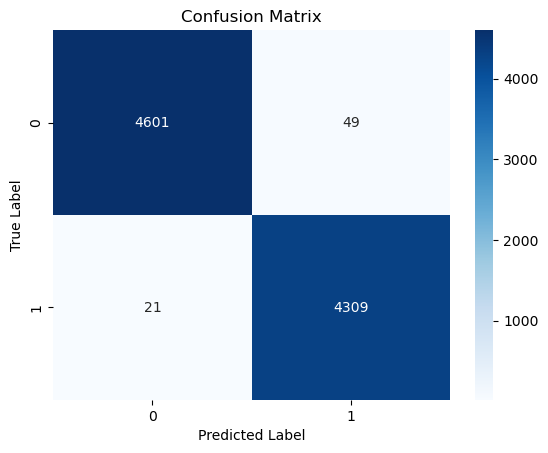

In [39]:
# Step 7: Compute and visualize confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # Your initial SVM model

scores = cross_val_score(svm_model, Xtrain_v, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)  #n_jobs=-1 for parallel processing

print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())
print("Standard Deviation of CV Accuracy:", scores.std())

Cross-Validation Scores: [0.99345768 0.9923441  0.99359688 0.99401364 0.9944313 ]
Mean CV Accuracy: 0.9935687206274899
Standard Deviation of CV Accuracy: 0.0007006875938310664


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}  # Example grid - expand as needed

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1) # Use the same kfold
grid_search.fit(Xtrain_v, y_train) # Fit on the complete data, as CV splits it internally

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_
y_pred_best = best_svm_model.predict(Xtest_v)

accuracy = accuracy_score(y_test, y_pred_best)
print("Test Set Accuracy:", accuracy)
print(classification_report(y_test, y_pred_best))

# %%
# Compute Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.993847124815552
Test Set Accuracy: 0.9951002227171493
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4650
           1       0.99      1.00      0.99      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Precision: 0.9942343173431735
Recall: 0.9956120092378753
F1-Score: 0.9949226863604893


In [44]:
# ROC-AUC Calculation
try:
    y_scores = best_svm_model.decision_function(Xtest_v)  
except AttributeError:  
    y_scores = best_svm_model.predict_proba(Xtest_v)[:, 1]  

auc = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC: {auc}")

AUC-ROC: 0.9997322009486206


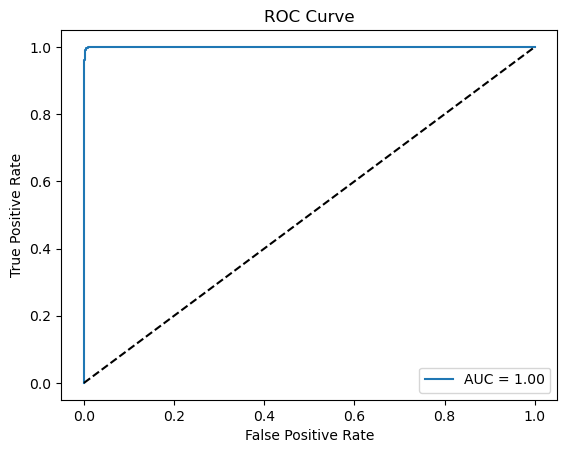

In [45]:
# Plotting the ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)  
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()